In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from PIL import Image

In [123]:
import keras.backend as K
K.set_image_data_format('channels_first')
K.set_floatx('float32')
print('Backend:        {}'.format(K.backend()))
print('Data format:    {}'.format(K.image_data_format()))

Backend:        tensorflow
Data format:    channels_first


In [150]:
file = pd.read_csv("fer2013/fer2013.csv")

In [137]:
file.head()

emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [138]:
file.shape

(35887, 3)

In [139]:
file["Usage"].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

In [140]:
file.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

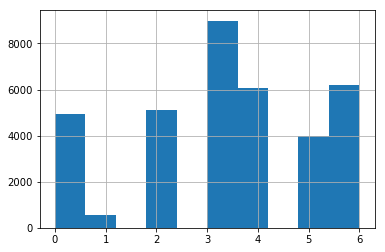

In [141]:
#Imbalanced Classes
file.emotion.hist()

In [9]:
file.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

In [142]:
file[file['Usage']=="PrivateTest"].head()

emotion                                             pixels        Usage
32298        0  170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...  PrivateTest
32299        5  7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...  PrivateTest
32300        6  232 240 241 239 237 235 246 117 24 24 22 13 12...  PrivateTest
32301        4  200 197 149 139 156 89 111 58 62 95 113 117 11...  PrivateTest
32302        2  40 28 33 56 45 33 31 78 152 194 200 186 196 20...  PrivateTest

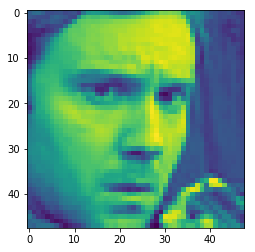

In [11]:
image = pd.to_numeric(file.pixels[0].split())
plt.imshow(image.reshape((48,48)))

In [152]:
n_samples = len(file)
n_samples_train = 28709
n_samples_test = 3589
n_samples_validation = 3589

X = np.zeros((n_samples, 48, 48))
for i in range(n_samples):
    X[i] = np.fromstring(file['pixels'][i], dtype=int, sep=' ').reshape(48, 48)

#Training set   
X_train = X[:n_samples_train].reshape(n_samples_train, -1)
X_train /=255.

X_train = X_train.reshape((28709,1,48,48))

In [143]:
#Function that transform the string to int, reshape to 48x48 and normalize dividing by 255
def str_to_int(x):
    X = pd.to_numeric(x).reshape((48,48)).astype(float)
    X /= 255.
    return X

#Xc = file.pixels[0].astype(float)
#Xc /= 255.

file['pixels'] = file.pixels.apply(lambda x: str_to_int(x.split()))
X_train = file['pixels'].reshape(len(file),-1)

C:\Users\mmarin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


In [148]:
X_train = file['pixels'].reshape(len(file),1,48,48)

C:\Users\mmarin\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


ValueError: cannot reshape array of size 35887 into shape (35887,1,48,48)

In [13]:
file.head()

emotion                                             pixels     Usage
0        0  [[0.274509803922, 0.313725490196, 0.3215686274...  Training
1        0  [[0.592156862745, 0.588235294118, 0.5764705882...  Training
2        2  [[0.905882352941, 0.83137254902, 0.61176470588...  Training
3        4  [[0.0941176470588, 0.125490196078, 0.141176470...  Training
4        6  [[0.0156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  Training

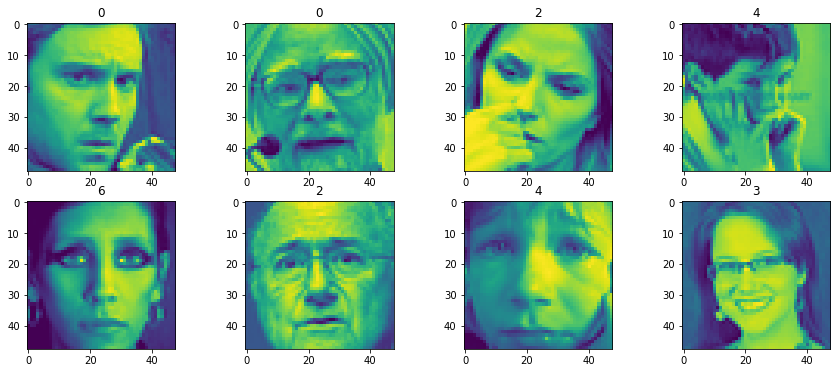

In [14]:
fig = plt.figure(figsize=(15,6))
for i,x in enumerate(file.pixels):
    if i<8:
        fig.add_subplot(2,4, i+1)
        plt.imshow(x)#, cmap='gray')
        plt.title(file.emotion[i])

## Dividing data in 3 sets

In [28]:
train = file[file['Usage']=="Training"]
y_train = train.emotion
train.head()

emotion                                             pixels     Usage
0        0  [[0.274509803922, 0.313725490196, 0.3215686274...  Training
1        0  [[0.592156862745, 0.588235294118, 0.5764705882...  Training
2        2  [[0.905882352941, 0.83137254902, 0.61176470588...  Training
3        4  [[0.0941176470588, 0.125490196078, 0.141176470...  Training
4        6  [[0.0156862745098, 0.0, 0.0, 0.0, 0.0, 0.0, 0....  Training

In [131]:
n_samples = len(file)
n_samples_train = 28709
n_samples_test = 3589
n_samples_validation = 3589

X = np.zeros((n_samples, 48, 48))
for i in range(n_samples):
    X[i] = np.fromstring(file['pixels'][i], dtype=int, sep=' ').reshape(48, 48)

#Training set   
X_train = X[:n_samples_train].reshape(n_samples_train, -1)
X_train /=255.

In [132]:
X_train.reshape((28709,1,48,48))

array([[[[ 0.2745098 ,  0.31372549,  0.32156863, ...,  0.20392157,
           0.16862745,  0.16078431],
         [ 0.25490196,  0.23921569,  0.22745098, ...,  0.21960784,
           0.20392157,  0.17254902],
         [ 0.19607843,  0.16862745,  0.21176471, ...,  0.19215686,
           0.21960784,  0.18431373],
         ..., 
         [ 0.35686275,  0.25490196,  0.16470588, ...,  0.28235294,
           0.21960784,  0.16862745],
         [ 0.30196078,  0.32156863,  0.30980392, ...,  0.41176471,
           0.2745098 ,  0.18039216],
         [ 0.30196078,  0.28235294,  0.32941176, ...,  0.41568627,
           0.42745098,  0.32156863]]],


       [[[ 0.59215686,  0.58823529,  0.57647059, ...,  0.50588235,
           0.54901961,  0.47058824],
         [ 0.59215686,  0.58431373,  0.58431373, ...,  0.47843137,
           0.55294118,  0.5372549 ],
         [ 0.59215686,  0.59215686,  0.61176471, ...,  0.42745098,
           0.48235294,  0.57254902],
         ..., 
         [ 0.7372549 ,  0.7372

In [29]:
test = file[file['Usage']=="PublicTest"]
y_test = test.emotion
test.head()

emotion                                             pixels       Usage
28709        0  [[0.996078431373, 0.996078431373, 0.9960784313...  PublicTest
28710        1  [[0.611764705882, 0.721568627451, 0.7764705882...  PublicTest
28711        4  [[0.270588235294, 0.462745098039, 0.2392156862...  PublicTest
28712        6  [[0.803921568627, 0.796078431373, 0.9254901960...  PublicTest
28713        3  [[0.341176470588, 0.309803921569, 0.2901960784...  PublicTest

In [30]:
test2 = file[file['Usage']=="PrivateTest"]
y_test2 = test2.emotion
test2.head()

emotion                                             pixels        Usage
32298        0  [[0.666666666667, 0.462745098039, 0.3960784313...  PrivateTest
32299        5  [[0.0274509803922, 0.0196078431373, 0.03137254...  PrivateTest
32300        6  [[0.909803921569, 0.941176470588, 0.9450980392...  PrivateTest
32301        4  [[0.78431372549, 0.772549019608, 0.58431372549...  PrivateTest
32302        2  [[0.156862745098, 0.109803921569, 0.1294117647...  PrivateTest

In [25]:
print (len(train),len(test),len(test2))

28709 3589 3589


## One-hot encoding

In [33]:
y_train_oh = np_utils.to_categorical(y_train)
y_test_oh = np_utils.to_categorical(y_test)
y_test2_oh = np_utils.to_categorical(y_test2)
print (y_train_oh.shape,y_test_oh.shape,y_test2_oh.shape)

(28709, 7) (3589, 7) (3589, 7)


## CNN

In [40]:
def model_build(nb_classes = 7):
    img_rows, img_cols = 48, 48 # DimensÃµes das imagens
    input_shape = (1, img_rows, img_cols)

    # Definindo a rede
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.5))

    # Aqui os features deixam de ser imagens
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    return model

model = model_build()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 46, 46)        320       
_________________________________________________________________
activation_3 (Activation)    (None, 32, 46, 46)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 23, 23)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 21, 21)        9248      
_________________________________________________________________
activation_4 (Activation)    (None, 32, 21, 21)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 10, 10)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 10, 10)        0         
__________

In [41]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=25, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

# define early stopping callback
earlystop = EarlyStopping(monitor='val_acc', 
                          patience=25, 
                          verbose=1, 
                          mode='auto')

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [153]:
batch_size=60
epochs=2
model.fit(X_train, y_train_oh, batch_size=batch_size, epochs=epochs,callbacks=[learning_rate_reduction, earlystop, checkpoint], verbose=1)# validation_data=(X_test, y_test))
#model.fit(x_train, y_train_oh, batch_size=batch_size, validation_data=(X_test, y_test_oh), epochs=epochs,callbacks=[learning_rate_reduction, earlystop, checkpoint], verbose=1)# validation_data=(X_test, y_test))

Epoch 1/2
28680/28709 [============================>.] - ETA: 0s - loss: 1.7642 - acc: 0.2837

C:\Users\mmarin\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\callbacks.py:878: RuntimeWarning: Learning Rate Plateau Reducing requires val_acc available!
  self.monitor, RuntimeWarning)
C:\Users\mmarin\AppData\Local\Continuum\Anaconda3\lib\site-packages\keras\callbacks.py:494: RuntimeWarning: Early stopping requires val_acc available!
  (self.monitor), RuntimeWarning)


TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'